In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [78]:
df = pd.read_csv('Module_3_CGM_glucose_data.csv')

In [79]:
df

,RecID,PtID,DeviceDtTm,Glucose
0,5850136,189,2000-11-10 04:37:41.000000,109
1,5850137,189,2000-11-10 04:47:43.000000,106
2,5850138,189,2000-11-10 04:57:38.000000,104
3,5850139,189,2000-11-10 05:07:37.000000,101
4,5850140,189,2000-11-10 05:17:40.000000,99
...,...,...,...,...
19625,13357166,189,2001-02-08 05:03:13.000000,381
19626,13357167,189,2001-02-08 05:13:20.000000,386
19627,13357168,189,2001-02-08 05:23:22.000000,394
19628,13357169,189,2001-02-08 05:33:23.000000,401


In [80]:
df.loc[99:101, ['DeviceDtTm', 'Glucose']]

,DeviceDtTm,Glucose
99,2000-11-10 21:08:38.000000,135
100,2000-11-10 21:18:31.000000,139
101,2000-11-10 21:28:39.000000,144


In [81]:
pd.set_option('display.max_rows', 100)
df.head(100)

,RecID,PtID,DeviceDtTm,Glucose
0,5850136,189,2000-11-10 04:37:41.000000,109
1,5850137,189,2000-11-10 04:47:43.000000,106
2,5850138,189,2000-11-10 04:57:38.000000,104
3,5850139,189,2000-11-10 05:07:37.000000,101
4,5850140,189,2000-11-10 05:17:40.000000,99
5,5850141,189,2000-11-10 05:27:44.000000,98
6,5850142,189,2000-11-10 05:37:40.000000,95
7,5850143,189,2000-11-10 05:47:40.000000,93
8,5850144,189,2000-11-10 05:57:41.000000,91
9,5850145,189,2000-11-10 06:07:42.000000,88


In [82]:
print(ts[0:2])
print(ys[99:101])

   time
0    10
1    20
     Glucose
99       135
100      139


In [97]:
df['time_diff'] = 10
df['time'] = (df.time_diff.cumsum() * 60)

In [98]:
ts = pd.DataFrame(df.time)
ys = pd.DataFrame(df['Glucose'])



In [99]:
# MODEL FIT AND PREDICTION

# Parameters of the predictive model. ph is Prediction horizon, mu is Forgetting factor.
ph = 100
mu = 0.9

In [100]:
#n_s = len(df)
n_s = 2000

# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)


In [101]:
# At every iteration of the for loop a new sample from CGM is acquired.
for i in range(2, n_s+1):# start out with 2 leading datapoints
    ts_tmp = ts[0:i]
########################################################################
#INSTEAD OF USING THE CURRENT VALUE AS OUR PREDICTED VALUE IN TRAINING
#WE USE THE VALUE AT THE PREDICTIVE HORIZON
########################################################################
    ys_tmp = ys[ph-1:ph-1+i]
    ns = len(ys_tmp)
    
    # The mu**k assigns the weight to the previous samples.
    weights = np.ones(ns)*mu
    for k in range(ns):
        weights[k] = weights[k]**k #More distant examples are downweighted exponentially
    weights = np.flip(weights, 0)
        

    # MODEL
    # Linear Regression.
    lm_tmp = LinearRegression() 
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)# times are x, glucose readings are y
    # Coefficients of the linear model, y = mx + q 
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_

    # PREDICTION
    # tp = ts.iloc[i-1,0] + ph #next time stamp. 
    tp = ts.iloc[i-2, 0]
    
    yp = m_tmp*tp + q_tmp #mx + b
      
    tp_pred[i-2] = tp
    yp_pred[i-2] = yp

In [90]:
# # Hypoglycemia threshold vector.    
# t_tot = [l for l in range(n_s*10)]
# hypoglycemiaTH = 70*np.ones(len(t_tot)) 
    
# fig, ax = plt.subplots(figsize=(10,10))
# fig.suptitle('Glucose Level Prediction', fontsize=22, fontweight='bold')
# ax.set_title('mu = %g, ph=%g ' %(mu, ph))
# ax.plot(tp_pred, yp_pred, label='Predicted Value') 
# ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='CGM data') 
# ax.plot(t_tot, hypoglycemiaTH, label='Hypoglycemia threshold')
# ax.set_xlabel('time (min)')
# ax.set_ylabel('glucose (mg/dl)')
# ax.legend()

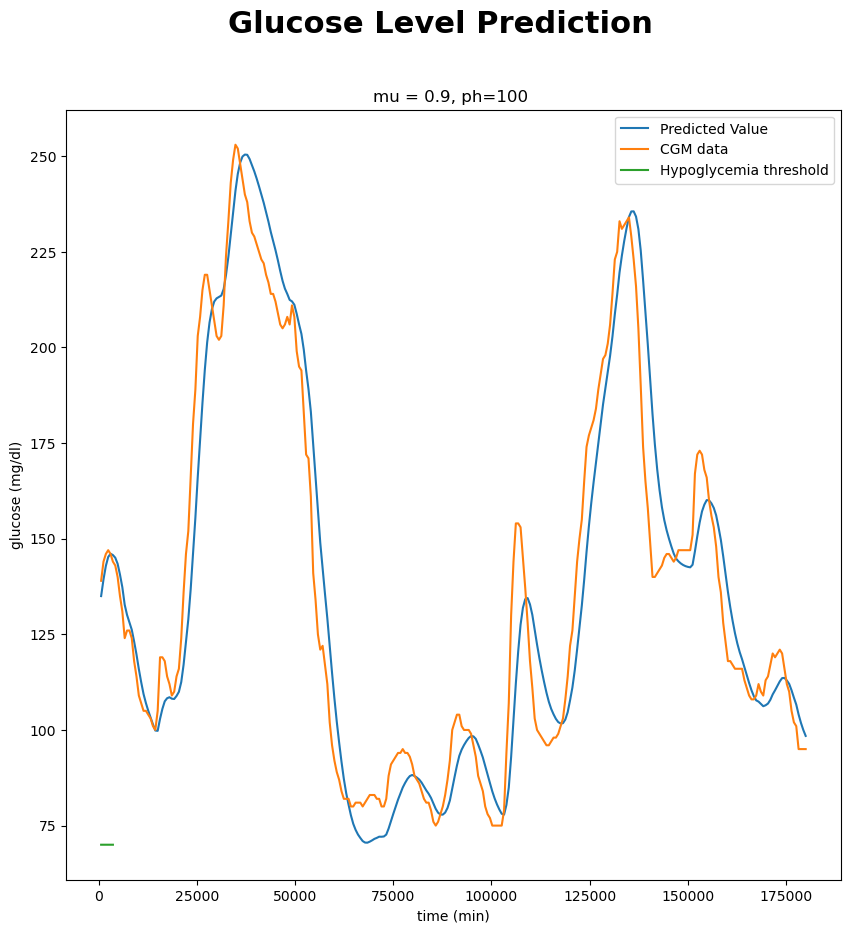

In [102]:
# PLOT EARLY
# Hypoglycemia threshold vector.    
t_tot = [l for l in range(int(min(tp_pred)), int(min(tp_pred+3000)))]
hypoglycemiaTH = 70*np.ones(len(t_tot))
    
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Glucose Level Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[0:300], yp_pred[0:300], label='Predicted Value') 
# ax.plot(ts.iloc[0:300,0], ys.iloc[0:300,0], label='CGM data') 
ax.plot(ts.iloc[0:300,0], ys.iloc[ph:300+ph,0], label='CGM data') # y-axis should be values of "ph" timesteps away from current time
ax.plot(t_tot, hypoglycemiaTH, label='Hypoglycemia threshold')
ax.set_xlabel('time (min)')
ax.set_ylabel('glucose (mg/dl)')
ax.legend()

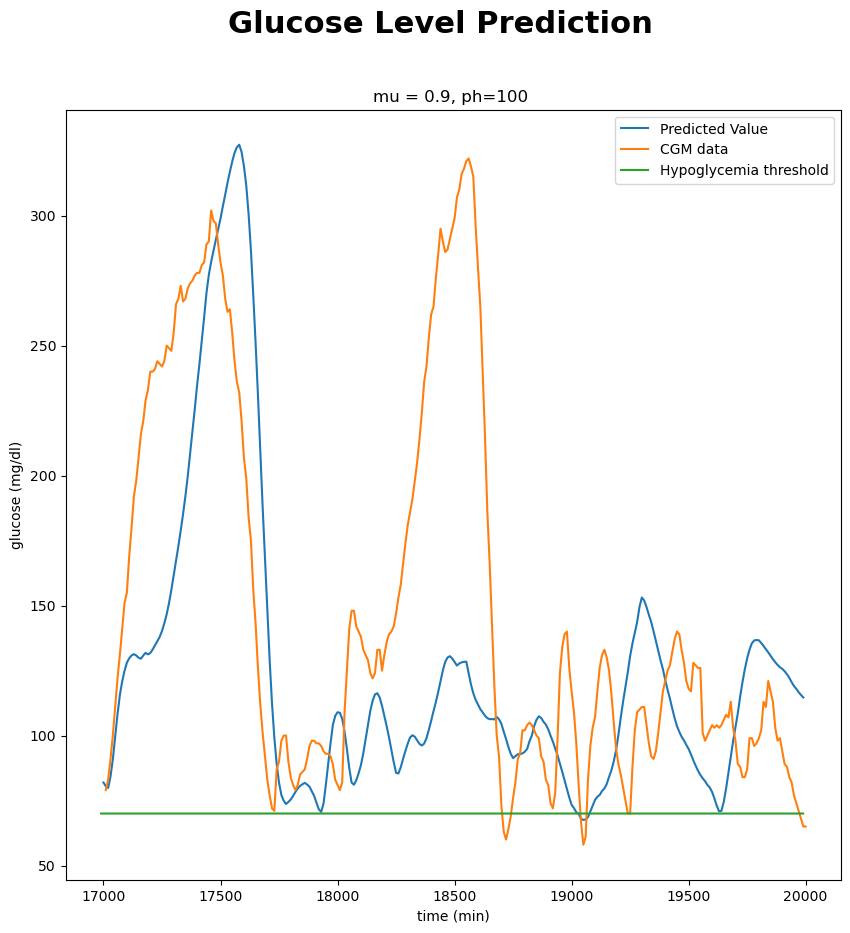

In [61]:
# PLOT LATE
# Hypoglycemia threshold vector.
maxt = max(tp_pred)
t_tot = [l for l in range(int(maxt)-3000, int(maxt))]
hypoglycemiaTH = 70*np.ones(len(t_tot)) 
    
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Glucose Level Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[-300:], yp_pred[-300:], label='Predicted Value') 
ax.plot(ts.iloc[n_s-300:n_s,0], ys.iloc[n_s-300:n_s,0], label='CGM data') 
ax.plot(t_tot, hypoglycemiaTH, label='Hypoglycemia threshold')
ax.set_xlabel('time (min)')
ax.set_ylabel('glucose (mg/dl)')
ax.legend()

In [44]:
from sklearn.metrics import mean_squared_error as mse
#################################################################
#here we calculate the correct index to compare based on the ph 
#and the resolution of the data--in this case, 10 minutes
################################################################
ph_index = round(ph/10) 
print("RMSE is", mse(ys[ph_index:2000+ph_index-1],yp_pred))

RMSE is 9076.737509980447
